In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
import seaborn as sns

In [3]:
stations = pd.read_csv('./data/station.csv', low_memory=False)
stations = stations.loc[:,['id','lat','long']]
stationsStart = stations
stationsStart['start_station_id'] = stations['id']
stationsStart['start_lat'] = stations['lat']
stationsStart['start_long'] = stations['long']
stationsStart = stationsStart.loc[:,['start_station_id','start_lat','start_long']]
stationsEnd = stations
stationsEnd['end_station_id'] = stations['id']
stationsEnd['end_lat'] = stations['lat']
stationsEnd['end_long'] = stations['long']
stationsEnd = stationsEnd.loc[:,['end_station_id','end_lat','end_long']]
stationsEnd[:10]

,end_station_id,end_lat,end_long
0,2,37.329732,-121.901782
1,3,37.330698,-121.888979
2,4,37.333988,-121.894902
3,5,37.331415,-121.893200
4,6,37.336721,-121.894074
5,7,37.333798,-121.886943
6,8,37.330165,-121.885831
7,9,37.348742,-121.894715
8,10,37.337391,-121.886995
9,11,37.335885,-121.885660


In [5]:
trip = pd.read_csv('data/trip.csv', low_memory=False)
trip['InicioFin'] = (trip['start_station_id'].astype(str)+trip['end_station_id'].astype(str)).astype(int)
import calendar
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['end_date'] = pd.to_datetime(trip['end_date'])
trip['start_hour'] = pd.to_datetime(trip['start_date'], format = '%H', errors = 'coerce').dt.hour
trip['end_hour'] = pd.to_datetime(trip['end_date'], format = '%H', errors = 'coerce').dt.hour
trip['date'] = trip['start_date'].dt.strftime('%w')

In [ ]:
#Trabaja de aca para abajo genio.

In [118]:
#Probamos si pasa algo distintos arreglando la distancia
tripAux = trip
tripAux = pd.merge(tripAux, stationsStart, on='start_station_id', how='right')
tripAux = pd.merge(tripAux, stationsEnd, on='end_station_id', how='right')
tripAux['distancia'] = (((tripAux['start_lat']-tripAux['end_lat'])**2+(tripAux['start_long']-tripAux['end_long'])**2)**0.5)*10000

In [21]:
#tambien notamos que muchos viajes inician y terminan en el mismo lugar
#Vemo si sin estos viajes se logra ver una relacion.
tripAux2 = tripAux
tripAux2 = tripAux2[tripAux.distancia != 0]

In [27]:
tripAux2[:2]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,InicioFin,start_hour,end_hour,date,start_lat,start_long,end_lat,end_long,distancia
368,5002,236,2013-08-29 20:01:00,Golden Gate at Polk,59,2013-08-29 20:05:00,South Van Ness at Market,66,375,Subscriber,94122,5966,20,20,4,37.781332,-122.418603,37.774814,-122.418954,65.27444
370,5015,449,2013-08-29 20:13:00,Golden Gate at Polk,59,2013-08-29 20:21:00,South Van Ness at Market,66,322,Subscriber,94115,5966,20,20,4,37.781332,-122.418603,37.774814,-122.418954,65.27444


In [73]:
#tambien notamos que muchos viajes inician y terminan en el mismo lugar
#Vemo si sin estos viajes se logra ver una relacion.
%matplotlib inline
tripAux2 = tripAux
tripAux2 = tripAux2[tripAux.distancia != 0]
tripAux2 = tripAux2[tripAux.date == '2']
#tripAux2 = tripAux2[tripAux.date != '5']
#tripAux2 = tripAux2[tripAux.date != '6']
tripAux2 = tripAux2[tripAux.subscription_type == 'Subscriber']

/home/geco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/geco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/home/geco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


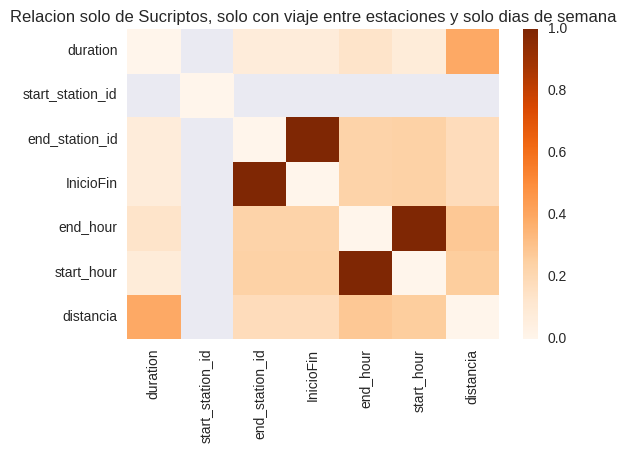

In [77]:
tripAux3 = tripAux2[tripAux.start_station_id == 29]
cor = tripAux3.loc[:,['duration','start_station_id','end_station_id','InicioFin','end_hour','start_hour','date','distancia']].corr().abs()
cor.values[[np.arange(7)]*2] = 0
sns.heatmap(cor,cmap='Oranges');
plt.title("Relacion solo de Sucriptos, solo con viaje entre estaciones y solo dias de semana")

In [82]:
from sklearn import linear_model
print(__doc__)

In [93]:
linea = tripAux3.loc[:,['duration','distancia']]
lineaX = linea.loc[:,['duration']]
lineaY = linea.loc[:,['distancia']]

# Se separa las variables explicadas
linea_X_train = lineaX[:-30]
linea_X_test = lineaX[-30:]
linea_Y_train = lineaY[:-30]
linea_Y_test = lineaY[-30:]

regr = linear_model.LinearRegression()
regr.fit(linea_X_train, linea_Y_train)

print (u'Regresión Mínimos Cuadrados Ordinarios')
# Coeficiente
print('Coeficientes:',regr.coef_)
# MSE
print("Residual sum of squares: %.2f" % np.mean((regr.predict(linea_X_test) - linea_Y_test) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(linea_X_test, linea_Y_test))

Regresión Mínimos Cuadrados Ordinarios
Coeficientes: [[ 0.02817081]]
Residual sum of squares: 13533.17
Varianza explicada: 0.08



In [137]:
##Hay que quitar todos los pueblo que no estan.
#la idea seria tener una matriz de Regr y aparar las cosas por separadas contra esa matrix y luego rearmarlas.
T = 0;
for x in range(0, 7):
    for y in range(2, 10):
        tripAuxX = tripAux[tripAux.date == str(x)]
        tripAuxX = tripAuxX[tripAuxX.start_station_id == y]
        linea = tripAuxX.loc[:,['duration','distancia']]
        lineaX = linea.loc[:,['duration']]
        lineaY = linea.loc[:,['distancia']]
        linea_X_train = lineaX[:-30]
        linea_X_test = lineaX[-30:]
        linea_Y_train = lineaY[:-30]
        linea_Y_test = lineaY[-30:]    
        regr = linear_model.LinearRegression()
        regr.fit(linea_X_train, linea_Y_train)
        T = T + np.mean((regr.predict(linea_X_test) - linea_Y_test) ** 2)   
        
T = T/20*6
T

distancia    775329.863996
dtype: float64

In [104]:
matriz = []
for x in range(7):
    matriz.append([0]*100)

for x in range(0, 7):
    for y in range(1, 100):
        matriz[x][y] = x+y   
    
for x in range(0, 7):
    for y in range(1, 100):
        print('{:d}'.format(matriz[x][y]))
        # print('{:d}, {:d}'.format(x,y))

    
 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
4